# Results from the sentiment pipeline extraction
This notebook compiles the results shown in the paper from the extracted entities.

In [1]:
from utils import *

## Importing data
The data here should be a list of dictionaries. Each dictionary should contain at least:
1. A sentence (key: sentence),
2. An extracted phase (key: phase),
3. An extracted property (key: property),
4. A relationship between phase and property, either "positive" or "negative (key: relationship).

The dataset found in `data/final_data.npy` contains all of the above in addition to a doi key indicating the paper from which the sentence comes.

In [2]:
# Loading the data that contains entities
path_to_entity_data = "data/final_data.npy"
sentence_data = np.load(path_to_entity_data, allow_pickle=True)

In [4]:
# In order for plots to look nice, here we change the lower case strings into better looking strings for the top phases
post_process_map = {
    'si': 'Si', 'β-mg2si': 'β-Mg2Si', 'sic': 'SiC', 'θ-al2cu': 'θ, Al2Cu', 'al2o3': 'Al2O3', 'η-mgzn2': 'η, MgZn2',
    't1-al2culi': 'T1, Al2CuLi', 'al3sc': 'Al3Sc', 'al3(sc,zr)': 'Al3(Sc,Zr)', 'al3zr': 'Al3Zr',
    's-al2cumg': 'S, Al2CuMg', 'β-al5fesi': 'β-Al5FeSi', 'tib2': 'TiB2', 'β-al3mg2': 'β-Al3Mg2', "s'": "S'",
    'ω-al2cu': 'ω, Al2Cu', 'fe-rich': 'Fe-rich', 'α-al': 'α-Al', 'al3fe': 'Al3Fe', 'al12mg17': 'Al12Mg17',
    'al3ti': 'Al3Ti', 'α-al2o3': 'α-Al2O3', 'b4c': 'B4C', 'tio2': 'TiO2', 'tic': 'TiC', 'al4c3': 'Al4C3',
    'al6mn': 'Al6Mn', 'ε-al3ni': 'ε, Al3Ni', 'cu-rich': 'Cu-rich', 'aln': 'AlN', 'si3n4': 'Si3N4', "q'": "Q'",
    'q-alcumgsi': 'Q, AlCuMgSi', 't-al2mg3zn3': 'T, Al2Mg3Zn3', 'al5fe2': 'Al5Fe2', 'al7cu2fe': 'Al7Cu2Fe',
    'al3er': 'Al3Er', 'al(mn,fe)si': 'Al(Mn,Fe)Si', 'δ-al3li': 'δ-Al3Li', 'γ-al2o3': 'γ-Al2O3', 'ceo2': 'CeO2',
    'sio2': 'SiO2', 'zro2': 'ZrO2', 'bc': 'BC', "β'-al3zr": "β'-Al3Zr", 'al13fe4': 'Al13Fe4',
    'cu mg co clusters': 'Cu-Mg co-clusters', 'wc': 'WC', 'al20cu2mn3': 'Al20Cu2Mn3', 'mgo': 'MgO',
    'al3(er,zr)': 'Al3(Er,Zr)', 'al(oh)3': 'Al(OH)3', "β-unknown": "β"
}

sentence_data_cleaned = post_processing(sentence_data, post_process_map)

In [5]:
# Counting the phases
phases = [s['phase'] for s in sentence_data]
sorted_phases = dict(sorted(Counter(phases).items(), key=lambda item: item[1], reverse=True))

# Counting the properties
properties = [s['property'] for s in sentence_data]
sorted_properties = dict(sorted(Counter(properties).items(), key=lambda item: item[1], reverse=True))

In [6]:
# Example of how to query for specific sentences
[s for s in sentence_data if s['phase']=="Si" and s['property']=="strength"]

[{'sentence': 'Besides, the existence of coarse primary Si in Al-Si-Zn filler metal decreased the brazed joint strength.',
  'phase': 'Si',
  'property': 'strength',
  'relationship': 'negative',
  'doi': '10.1016/j.matlet.2016.05.052'},
 {'sentence': 'For normal casting hypereutectic Al–Si alloys, the precipitation of the coarse primary Si phase destroys the continuity of the matrix and greatly reduces the strength and durability of the alloys.',
  'phase': 'Si',
  'property': 'strength',
  'relationship': 'negative',
  'doi': '10.1016/j.apsusc.2015.04.029'},
 {'sentence': 'Under normal cast condition, primary silicon crystals in unmodified hypereutectic Al–Si alloys exhibit a variety of shapes, such as polygonal, starlike (fivefold), coarse platelet, etc.. Generally, the machinability of hypereutectic Al–Si alloy is worse due to the presence of coarse primary silicon.',
  'phase': 'Si',
  'property': 'strength',
  'relationship': 'negative',
  'doi': '10.1016/j.matlet.2004.10.042'},


## Histograms
This section plots the frequency histograms for phases and properties.

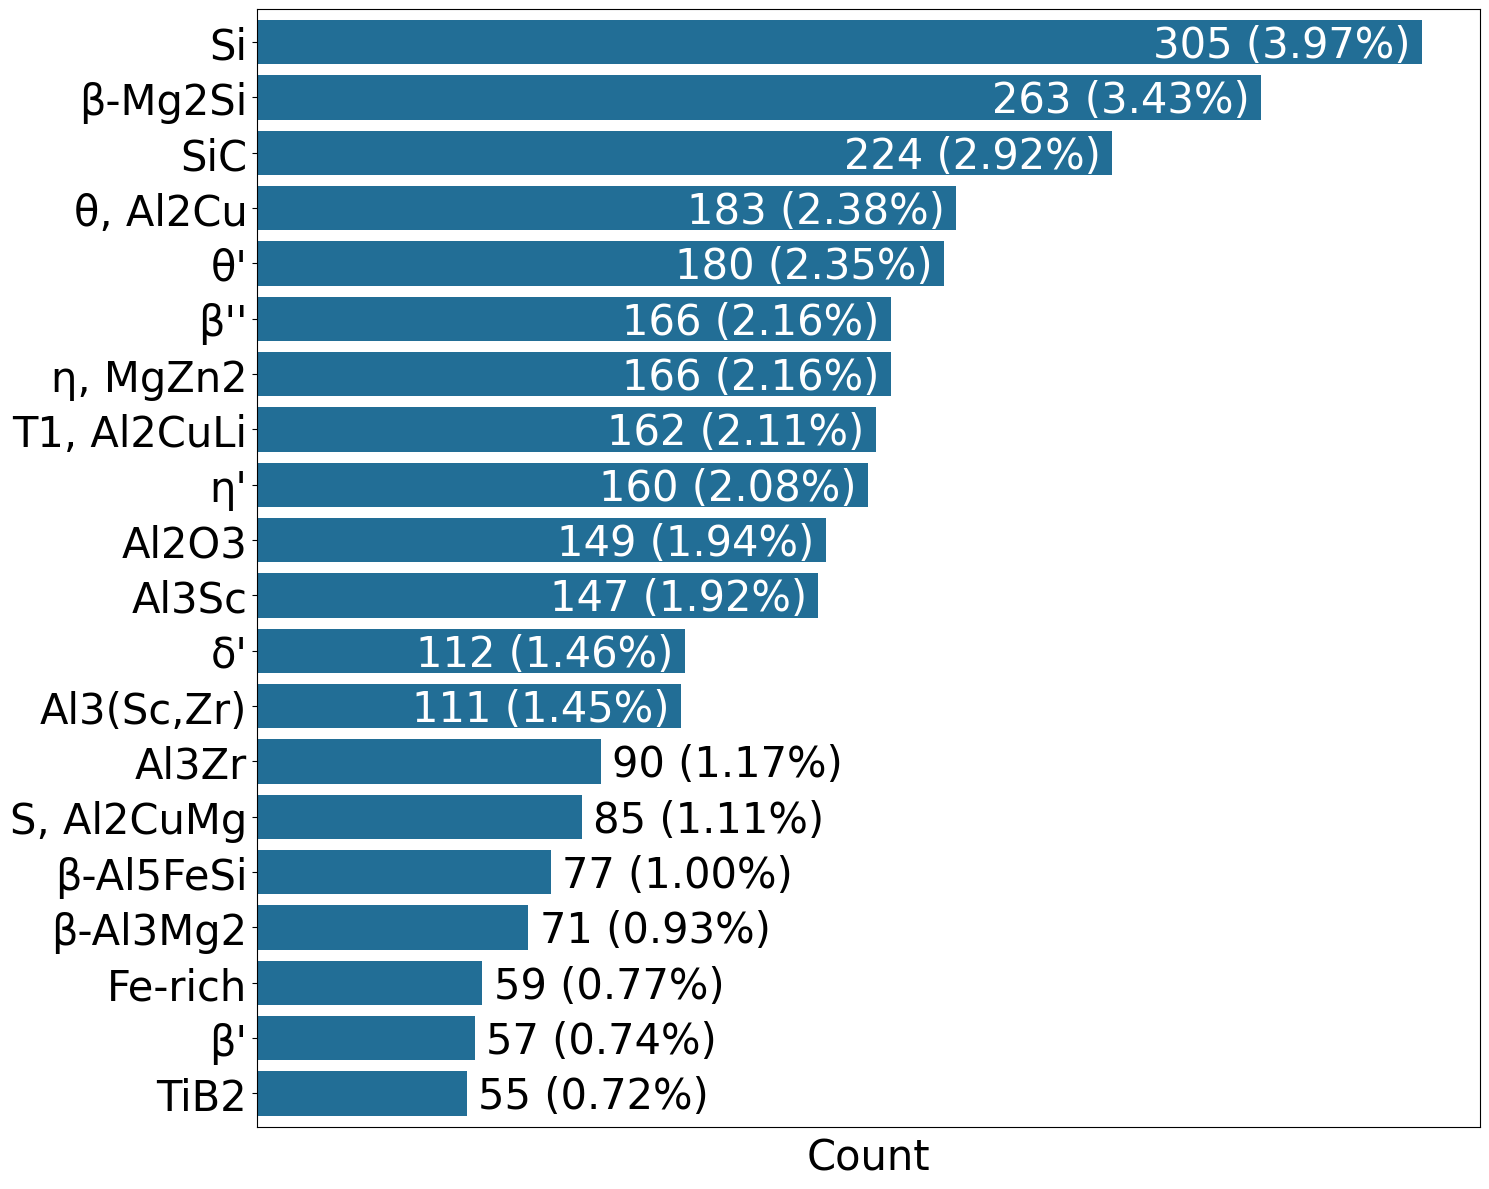

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Get the top 20 most frequent phases
n = 20
to_plot = np.array(list(sorted_phases.items())[:n])

# to_plot[:,0] contains the name and to_plot[:,1] the frequency
ax.barh(to_plot[:,0], to_plot[:,1].astype(int), color="#226E96")

ax.set_xlabel('Count', fontsize=30)
ax.tick_params(axis='y', which='both', labelsize=30)
ax.tick_params(axis='x', which='both', labelsize=30)
ax.set_xticks([])

# Add labels inside (or outside) the bars depending on width
for i, count in enumerate(to_plot[:,1].astype(int)):
    if count>=1/3*to_plot[:,1].astype(int).max():
        ax.text(count-3, i+0.05, f"{count} ({count/len(sentence_data)*100:.2f}%)", fontsize=30, va='center', ha='right', c='white')
    else:
        ax.text(count+3, i+0.05, f"{count} ({count/len(sentence_data)*100:.2f}%)", fontsize=30, va='center', ha='left')

fig.tight_layout()
ax.margins(y=0.01)
plt.gca().invert_yaxis()

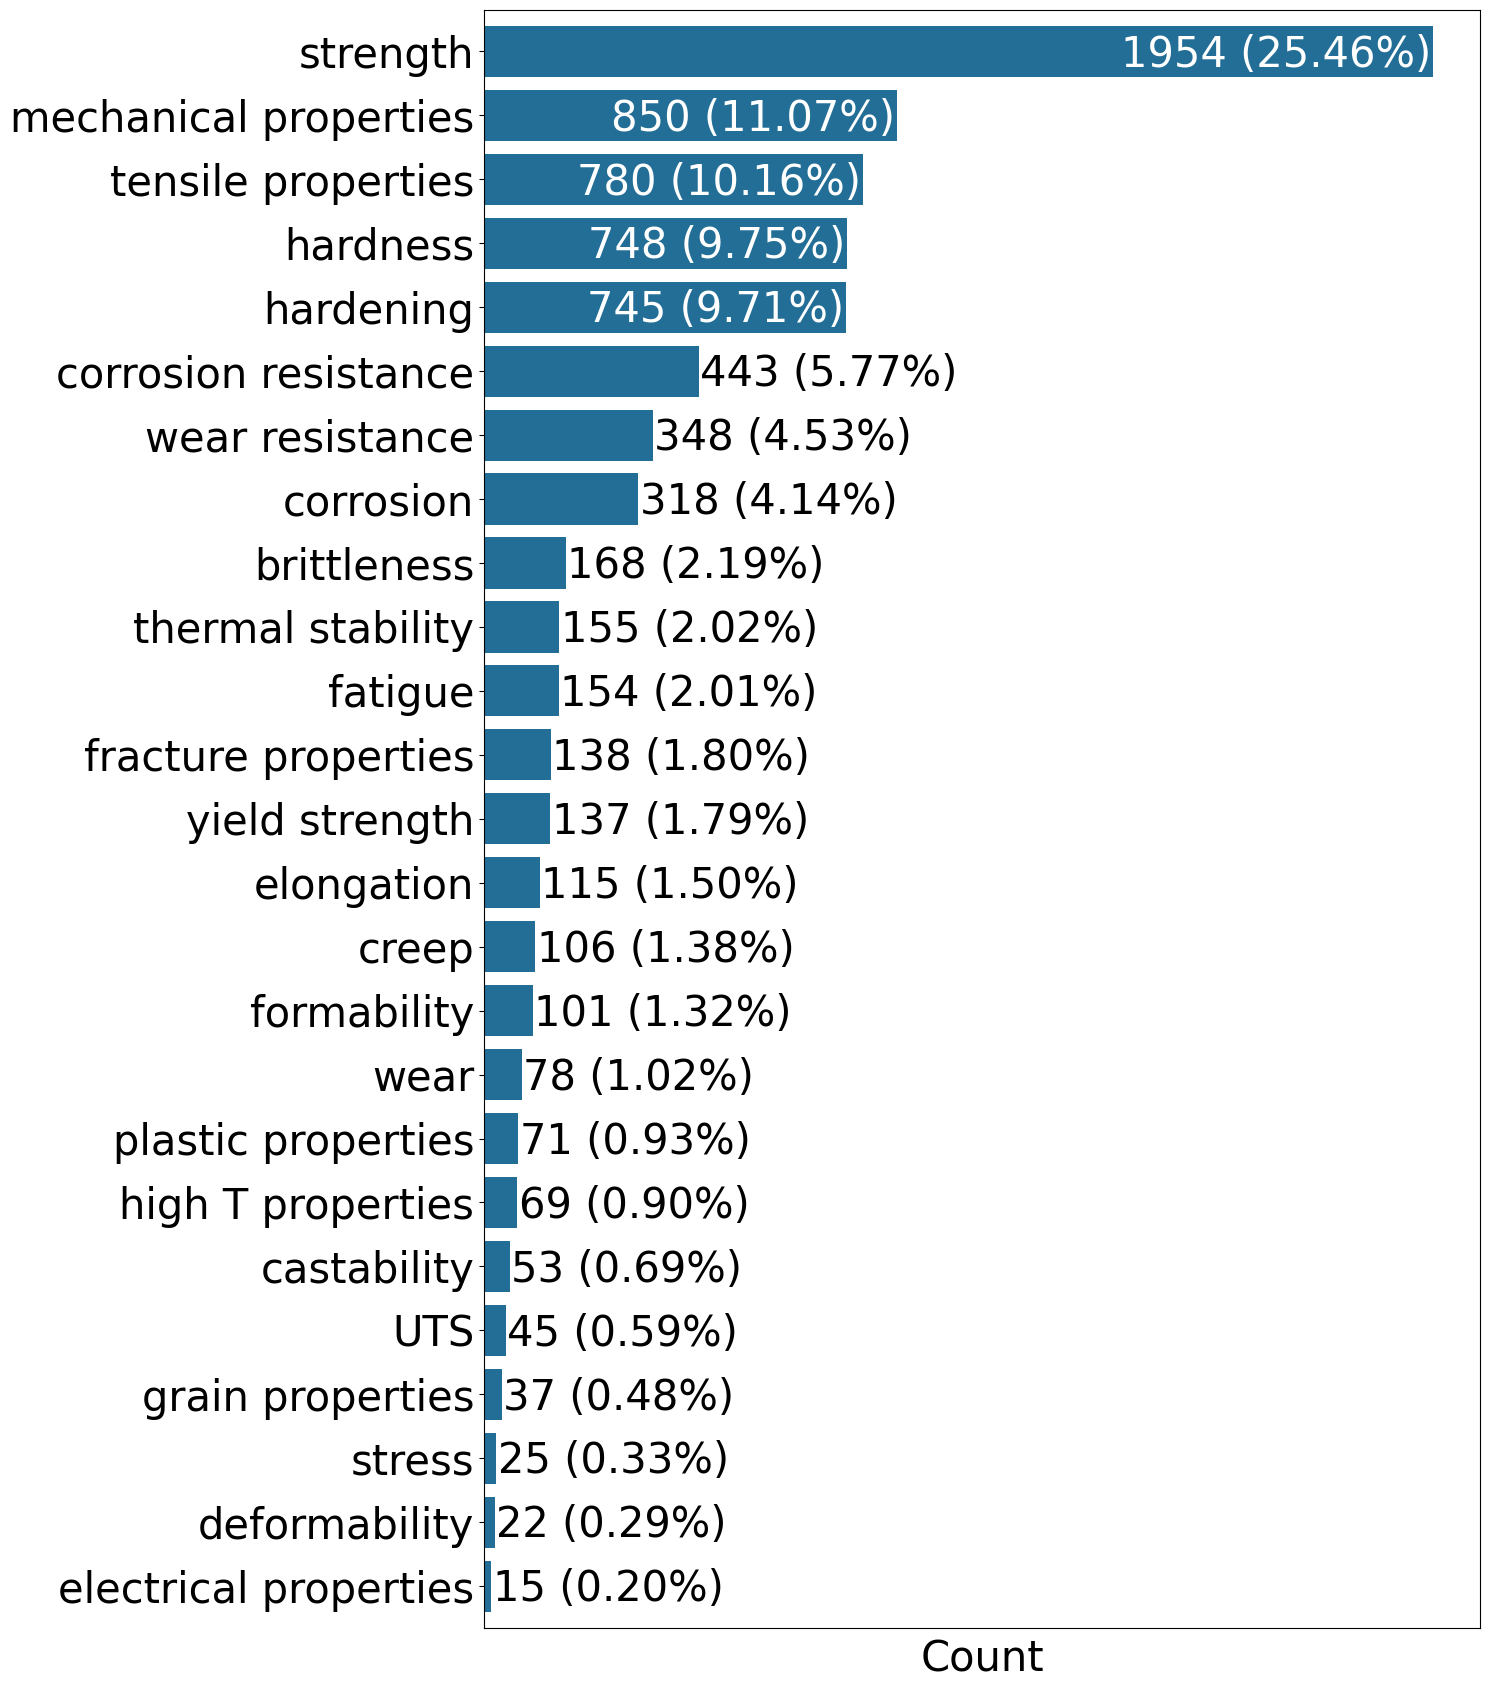

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15, 17))
# fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Plot all of the properties
n = len(sorted_properties)
to_plot = np.array(list(sorted_properties.items())[:n])

# to_plot[:,0] contains the name and to_plot[:,1] the frequency
ax.barh(to_plot[:,0], to_plot[:,1].astype(int), color="#226E96")

ax.set_xlabel('Count', fontsize=30)
ax.tick_params(axis='y', which='both', labelsize=30)
ax.tick_params(axis='x', which='both', labelsize=30)
ax.set_xticks([])

# Add labels inside (or outside) the bars depending on width
for i, count in enumerate(to_plot[:,1].astype(int)):
    if count>=1/3*to_plot[:,1].astype(int).max():
        ax.text(count-3, i+0.05, f"{count} ({count/len(sentence_data)*100:.2f}%)", fontsize=30, va='center', ha='right', c='white')
    else:
        ax.text(count+3, i+0.05, f"{count} ({count/len(sentence_data)*100:.2f}%)", fontsize=30, va='center', ha='left')

fig.tight_layout()
ax.margins(y=0.01)
plt.gca().invert_yaxis()

## Phase-property heatmap
This section plots the heatmap of the phase-property pairs. Each square respresents the number of sentences that mention this specific phase and property. The graph is normalised to highlight trends. Otherwise, the heatmap would only show that the top phases and top properties (upper left corner) are mentioned a lot together.

In [7]:
viridis = matplotlib.colormaps['viridis']
viridis.set_bad([175/256, 175/256, 175/256, 1])

In [8]:
# Find the top 10 phases and properties
ph_list = list(sorted_phases)[:10]
pr_list = list(sorted_properties)[:10]

# Sum the number of sentences for each phase and property pari
freq_mat = np.array([
    len([1 for s in sentence_data if s['phase']==ph and s['property']==pr])
    for pr in pr_list for ph in ph_list]
).reshape(len(pr_list),len(ph_list))

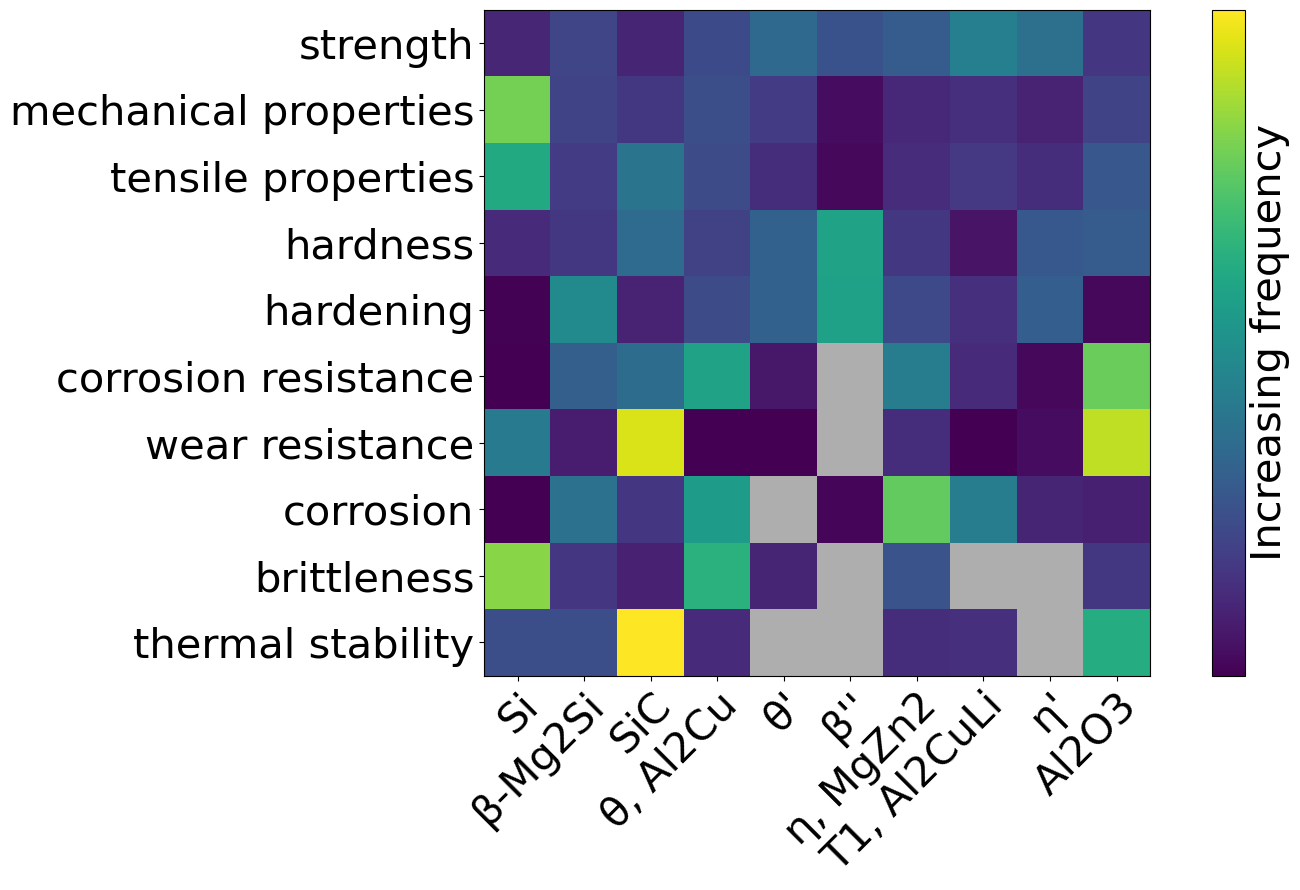

In [9]:
fig, ax = plt.subplots(figsize=(15, 9))

# Normalise the frequencies by rows and columns
to_show = freq_mat/freq_mat.sum(axis=0)/freq_mat.sum(axis=1, keepdims=True)

# If there are no mentions, replace value with np.nan to use the nan color of the color palette
to_show = np.where(to_show==0, np.nan, to_show)

matshow = ax.matshow(to_show, cmap=viridis)
cbar = fig.colorbar(matshow)
cbar.set_ticks([])
cbar.set_label("Increasing frequency", fontsize=30)

ax.set_xticks(range(len(ph_list)))
ax.set_xticklabels(ph_list, rotation=45, ha='right', fontsize=30, rotation_mode="anchor")
ax.tick_params(axis="x", top=False, labelbottom=True, labeltop=False)
ax.set_yticks(range(len(pr_list)))
ax.set_yticklabels(pr_list, fontsize=30)

fig.tight_layout()

## Property deepdives
Here we plot, for specific properties, the top phases mentioned with it as well as a bar plot of positive or negative relationships.

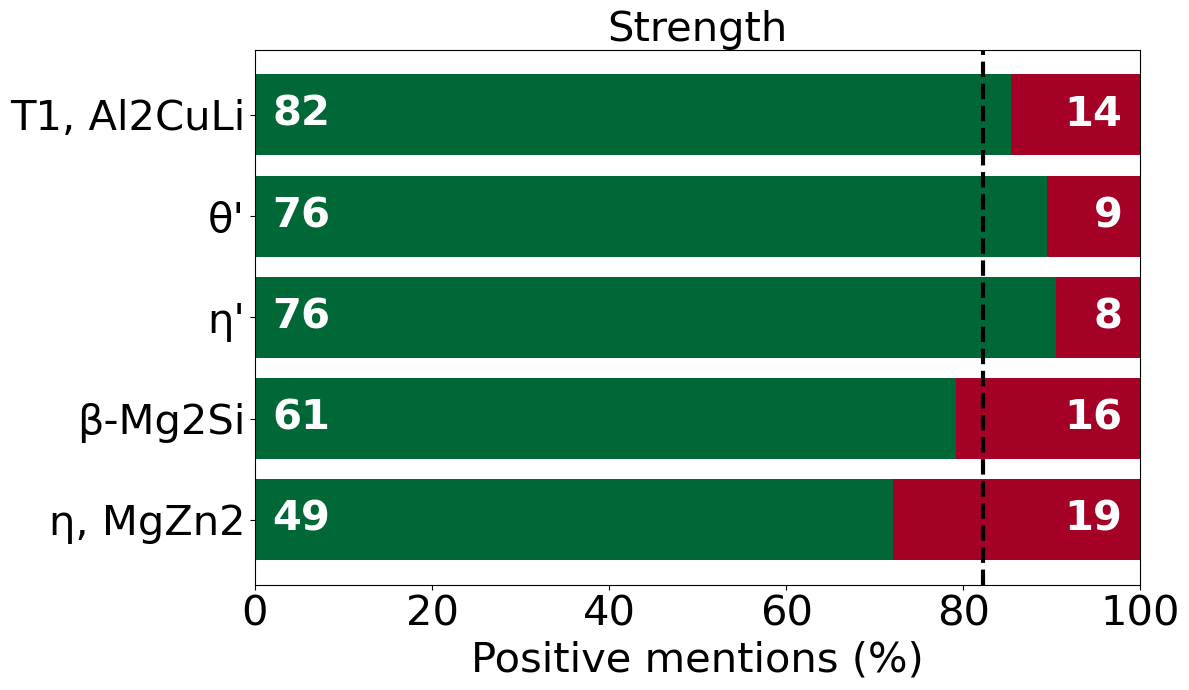

In [11]:
plot_sentiment('strength', sentence_data, n=5, save=False)

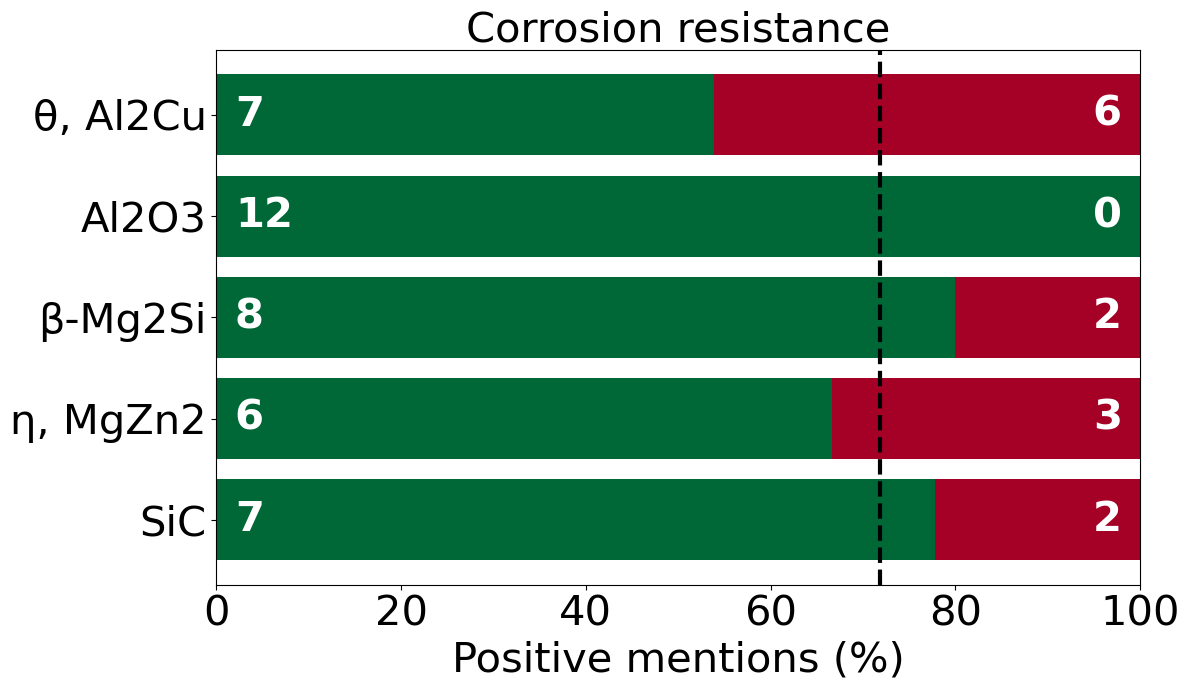

In [12]:
plot_sentiment('corrosion resistance', sentence_data, n=5, save=False)